In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Initial conditions

In [2]:
def flat_u(j):
    """produces a flat line at zero"""
    y = 0
    return y

def h_spike(j, midpoint):
    """produces a curve which is zero everywhere but h = 1 at one point in the centre"""
    if j == midpoint:
        y = 1
    else:
        y = 0
    return y

def h_cosbell(j):
    """produces a curve which has a bump in the centre and is surrounded by zero either side"""
    if 0.25 <= j <= 0.75:
        y = math.cos(2*(math.pi)*(j - 0.5))
    else:
        y = 0
    return y

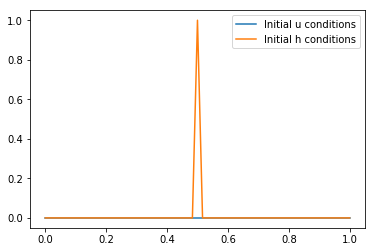

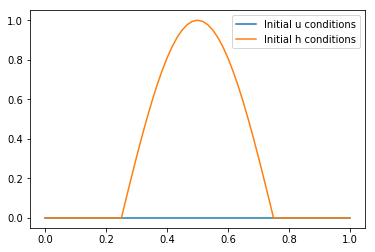

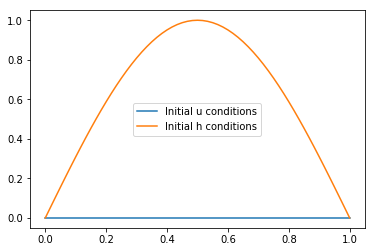

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  6.12323400e-17,   5.23359562e-02,   1.04528463e-01,
          1.56434465e-01,   2.07911691e-01,   2.58819045e-01,
          3.09016994e-01,   3.58367950e-01,   4.06736643e-01,
          4.53990500e-01,   5.00000000e-01,   5.44639035e-01,
          5.87785252e-01,   6.29320391e-01,   6.69130606e-01,
          7.07106781e-01,   7.43144825e-01,   7.77145961e-01,
          8.09016994e-01,   8.38670568e-01,   8.66025404e-01,
          8.91006524e-01,   9.13545458e-01,   9.33580426e-01,
          9.51056516e-01,   9.65925826e-01,   9.78147601e-01,
          9.87688341e-01,   9.94521895e-01,   9.98629535e-01,
          1.00000000e+00,   9.986

In [3]:
nx = 60 # number of points from x = 0 to x = 1
nt = 100 # number of time steps

-

### Forcing term is $f= 20\sqrt{(gH)}\sin(\omega t)$ at $ x = 0.5$

## A-grid

In [143]:
def A_grid_explicit(initialconditions, nx, nt, H = 1, g = 1, w = 8, c = 0.1, Forcing = False):
    """This function simulates the shallow water equations using an explicit method on the colocated scheme

    initial conditions: function which specifies the initial conditions for the system 
    nx:                 number of space steps
    nt:                 number of time steps
    H:                  mean fluid depth set to 1 unless otherwise specified
    g:                  acceleration due to gravity scaled to 1
    w:                  frequency of forcing term
    c:                  courant number (c = root(gH)dt/dx)
    Forcing:            if this variable is True then a forcing term will be included 
                        in the scheme. If False no forcing term will be included
    """
    
    # set initial conditions
    initialu, initialh, midpoint, x = initialconditions(nx,nt, plot = False)
    
    # initialize the system
    uOld = initialu.copy()
    hOld = initialh.copy()
    u = initialu.copy()
    h = initialh.copy()

    dx = 1/nx
    dt = (c*dx)/math.sqrt(g*H)

    # loop over time steps
    for it in range(int(nt)): 
        for y in range(nx):
            # forward in time and centred in space
            u[y%nx] = uOld[y%nx] - (c*math.sqrt(g/H)/2)*(hOld[(y+1)%nx] - hOld[(y-1)%nx])
            
            # backward in time and centred in space
            if Forcing == True:
                # add forcing term at midpoint
                if y == midpoint:
                    h[y%nx] = hOld[y%nx] - (c*math.sqrt(H/g)/2)*(u[(y+1)%nx] - u[(y-1)%nx]) + 20*dt*math.sqrt(g*H)*math.sin(w*it*dt)
                else:
                    h[y%nx] = hOld[y%nx] - (c*math.sqrt(H/g)/2)*(u[(y+1)%nx] - u[(y-1)%nx])
            elif Forcing == False:    
                h[y%nx] = hOld[y%nx] - (c*math.sqrt(H/g)/2)*(u[(y+1)%nx] - u[(y-1)%nx]) # backward in time and centred in space
            else:    
                print("Error: Forcing must be true or false")
                break
                
        # as would like to plot from 0 to 1 set the value of u and h at end point using periodic boundary conditions
        u[nx] = u[0].copy()
        h[nx] = h[0].copy()
        
        # copy u and h for next iteration
        hOld = h.copy()
        uOld = u.copy()
    return u, h, x

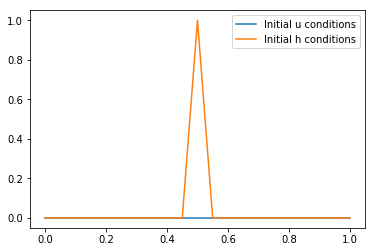

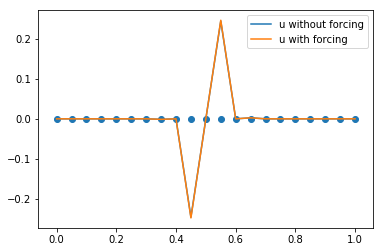

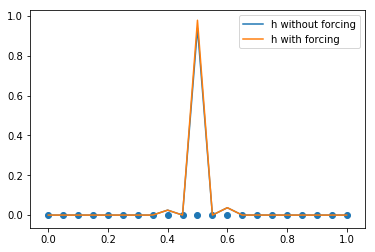

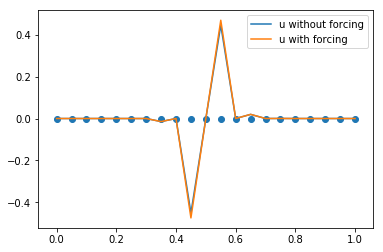

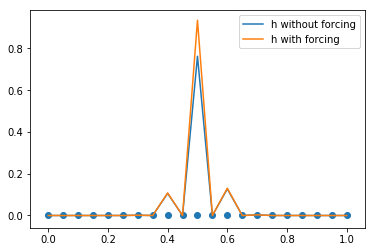

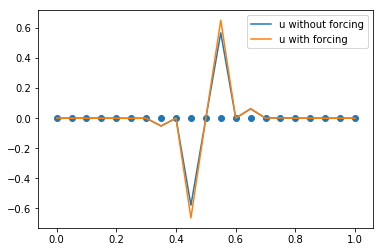

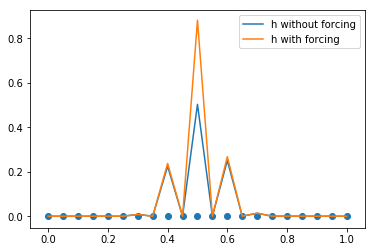

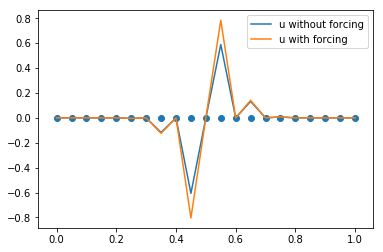

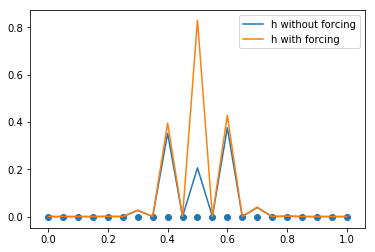

In [5]:
nt = 20

timerange = np.linspace(0, nt, 5)

initialconditions_spike(20,nt)

# plot solution at various time iterations for an explicit method on a colocated grid for the initial condition where u is zero everywhere 
# and h is zero everywhere apart from one point at the centre where it is one
for i in timerange[1:]:
    u, h, x1 = A_grid_explicit(initialconditions_spike, 20, i, Forcing = False)
    u_forcing, h_forcing, x2 = A_grid_explicit(initialconditions_spike, 20, i, Forcing = True)

    plt.ion()
    plt.plot(x1, u, label = 'u without forcing')
    plt.plot(x2, u_forcing, label = 'u with forcing')
    plt.scatter(x1,np.zeros_like(x1))
    plt.legend(loc = 'best')
    plt.show()

    plt.plot(x1, h, label = 'h without forcing')
    plt.scatter(x1,np.zeros_like(x1))
    plt.plot(x2, h_forcing, label = 'h with forcing')
    plt.legend(loc = 'best')
    plt.show()


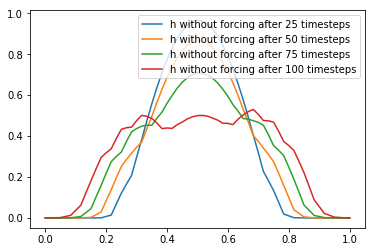

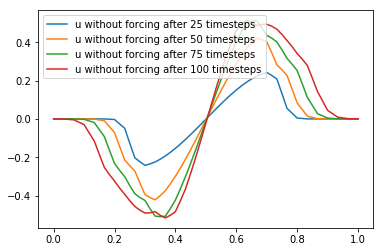

In [6]:
timerange = np.linspace(0, 1, 5)
nt = 100
# plot solution at various time iterations for an explicit method on a colocated grid for the initial condition where u is zero everywhere 
# and h has a bump in the centre and is surrounded by zero either side
for i in timerange[1:]:
    u, h, x1 = A_grid_explicit(initialconditions_cosbell, nx, i*nt, H = 1, g = 1, w = 8, Forcing = False)
    #u_forcing, h_forcing, x2 = A_grid_explicit(initialconditions_cosbell, nx, i*nt, H = 1, g = 1, w = 8, Forcing = True)

    plt.ion()
    plt.plot(x1, h, label = 'h without forcing after ' + str(int(i*nt)) + ' timesteps')
    #plt.plot(x2, h_forcing, label = 'h with forcing')
    plt.legend(loc = 'best')
plt.show()

for i in timerange[1:]:
    u, h, x1 = A_grid_explicit(initialconditions_cosbell, nx, i*nt, H = 1, g = 1, w = 8, Forcing = False)
    plt.ion()
    plt.plot(x1, u, label = 'u without forcing after ' + str(int(i*nt)) + ' timesteps')
    #plt.plot(x2, u_forcing, label = 'u with forcing')
    plt.legend(loc = 'best')
plt.show()



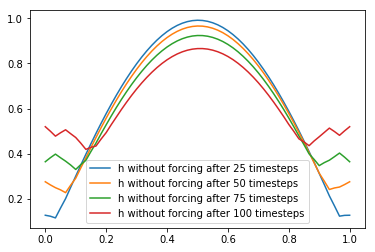

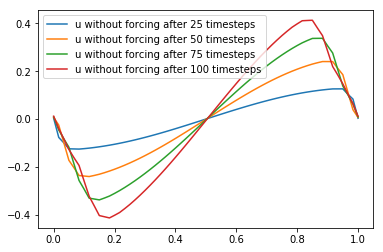

In [7]:
timerange = np.linspace(0, 1, 5)
nt = 100


# plot solution at various time iterations for an explicit method on a colocated grid for the initial condition where u is zero everywhere 
# and h is cos

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in timerange[1:]:
    u, h, x1 = A_grid_explicit(initialconditions_cos, nx, i*nt, H = 1, g = 1, w = 8, Forcing = False)
    #u_forcing, h_forcing, x2 = A_grid_explicit(initialconditions_cos, nx, i*nt, H = 1, g = 1, w = 8, Forcing = True)

    ax1.plot(x1, h, label = 'h without forcing after ' + str(int(i*nt)) + ' timesteps')
    #plt.plot(x2, h_forcing, label = 'h with forcing')
    ax1.legend(loc = 'best')
    
    ax2.plot(x1, u, label = 'u without forcing after ' + str(int(i*nt)) + ' timesteps')
    #plt.plot(x2, u_forcing, label = 'u with forcing')
    ax2.legend(loc = 'best')

#fig1.show()
#fig2.show()



## C-grid

In [144]:
def C_grid_explicit(initialconditions, nx, nt, H = 1, g = 1, w = 8, c = 0.1, Forcing = False):
    """This function simulates the shallow water equations using an explicit method on the staggered scheme

    initial conditions: function which specifies the initial conditions for the system 
    nx:                 number of space steps
    nt:                 number of time steps
    H:                  mean fluid depth set to 1 unless otherwise specified
    g:                  acceleration due to gravity scaled to 1
    w:                  frequency of forcing term
    c:                  courant number (c = root(gH)dt/dx)
    Forcing:            if this variable is True then a forcing term will be included 
                        in the scheme. If False no forcing term will be included
    """
    # set initial conditions
    initialu, initialh, midpoint, x = initialconditions(nx,nt, plot = False)
    
    
    uhalf = np.zeros(len(initialu))
    
    # for a c-grid the velocity u is stagerred in the x-direction by half
    for i in range(0, len(initialu)):
        uhalf[i] = flat_u(i+1/2)
        # therefore uhalf[i] = u_{i + 1/2}
    
    # initialize the system
    h_cgrid = initialh.copy()
    
    uOld = uhalf.copy()
    hOld = initialh.copy()

    dx = 1/nx
    dt = (c*dx)/math.sqrt(g*H)
    
    # loop over time steps
    for it in range(int(nt)): 
        for y in range(nx):
            # forward in time and centred in space
            uhalf[(y)%nx] = uOld[y%nx] - (c*math.sqrt(g/H))*(hOld[(y + 1)%nx] - hOld[y%nx]) 
            # backward in time and centred in space
            if Forcing == True:
            # add forcing term at midpoint
                if y == midpoint:
                    h_cgrid[y%nx] = hOld[y%nx] - (c*math.sqrt(H/g))*(uhalf[y%nx] - uhalf[(y-1)%nx]) + 20*dt*math.sqrt(g*H)*math.sin(w*dt*it)# backward in time and centred in space
                else:
                    h_cgrid[y%nx] = hOld[y%nx] - (c*math.sqrt(g/H))*(uhalf[y%nx] - uhalf[(y-1)%nx])
            elif Forcing == False:    
                h_cgrid[y%nx] = hOld[y%nx] - (c*math.sqrt(g/H))*(uhalf[y%nx] - uhalf[(y-1)%nx]) 
            else:
                print("Error: Forcing must be true or false")
                break
        
        # as would like to plot from 0 to 1 set the value of u and h at end point using periodic boundary conditions
        # however as the grid is staggered uhalf[nx] = u_{nx + 1/2}. Therefore when plot uhalf need to remove last point
        uhalf[nx] = uhalf[0].copy()
        h_cgrid[nx] = h_cgrid[0].copy()
        
        # copy u and h for next iteration
        hOld = h_cgrid.copy()
        uOld = uhalf.copy()
    return uhalf, h_cgrid, x

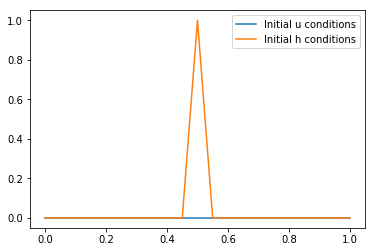

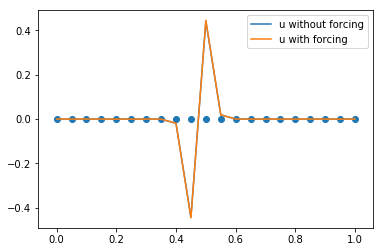

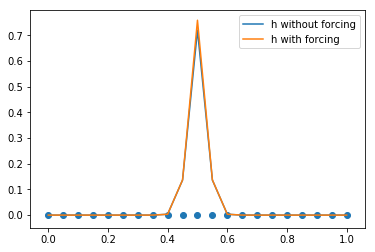

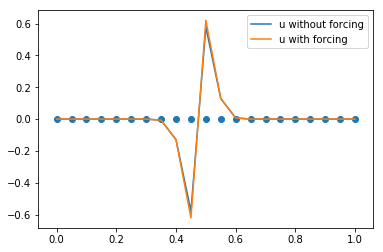

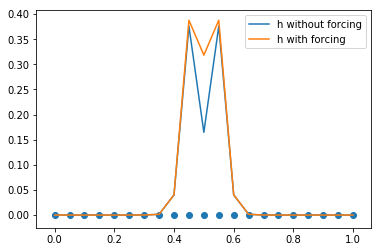

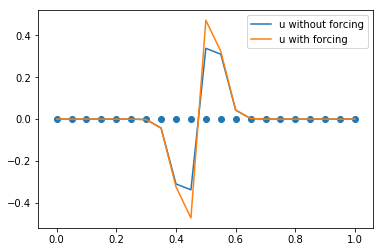

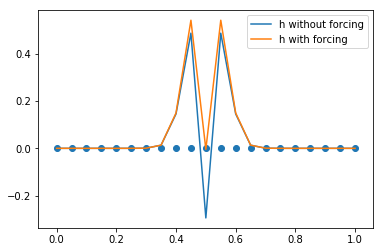

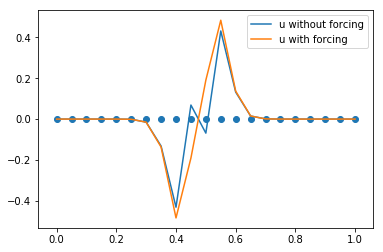

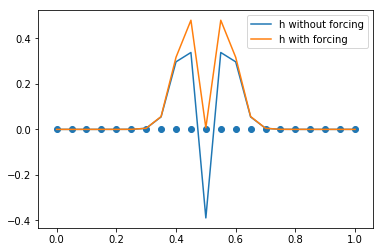

In [9]:
nt = 20
timerange = np.linspace(0, nt, 5)

initialconditions_spike(20, nt)

# plot solution at various time iterations for staggered grid for the initial condition where u is zero everywhere 
# and h is zero everywhere apart from one point at the centre where it is one
for i in timerange[1:]:
    u, h, x1 = C_grid_explicit(initialconditions_spike, 20, i, Forcing = False)
    u_forcing, h_forcing, x2 = C_grid_explicit(initialconditions_spike, 20, i, Forcing = True)

    plt.ion()
    plt.plot(x1, u, label = 'u without forcing')
    plt.plot(x2, u_forcing, label = 'u with forcing')
    plt.scatter(x1,np.zeros_like(x1))
    plt.legend(loc = 'best')
    plt.show()

    plt.plot(x1, h, label = 'h without forcing')
    plt.scatter(x1,np.zeros_like(x1))
    plt.plot(x2, h_forcing, label = 'h with forcing')
    plt.legend(loc = 'best')
    plt.show()

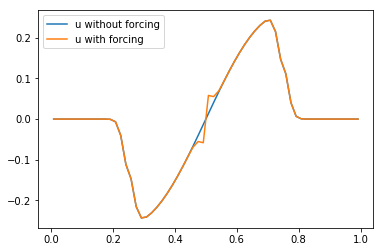

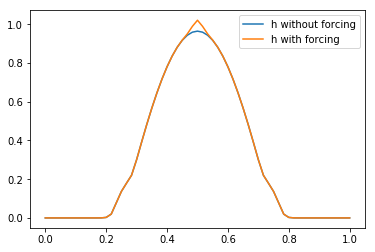

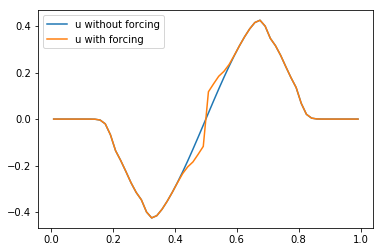

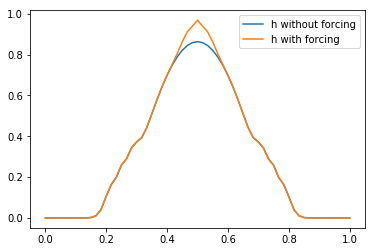

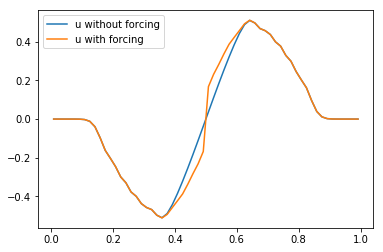

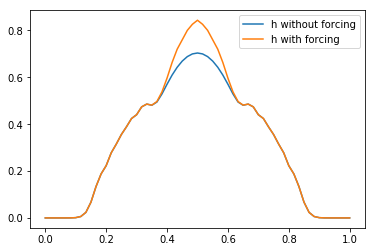

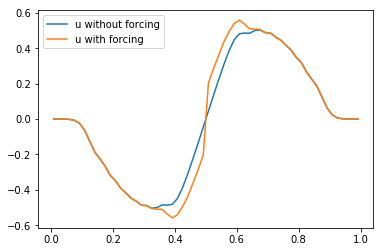

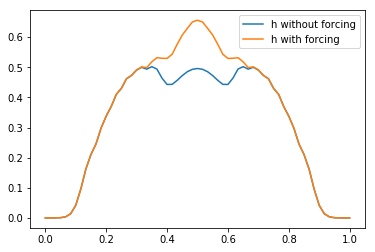

In [10]:
nt = 100
timerange = np.linspace(0, 1, 5)

# plot solution at various time iterations for staggered grid for the initial condition where u is zero everywhere 
# and h has a bump in the centre and is surrounded by zero either side
for i in timerange[1:]:
    u, h, x1 = C_grid_explicit(initialconditions_cosbell, nx, i*nt, H = 1, g = 1, w = 8, Forcing = False)
    u_forcing, h_forcing, x2 = C_grid_explicit(initialconditions_cosbell, nx, i*nt, H = 1, g = 1, w = 8, Forcing = True)

    plt.ion()
    plt.plot((x1 + 1/(2*nx))[:-1], u[:-1], label = 'u without forcing')
    plt.plot((x2 + 1/(2*nx))[:-1], u_forcing[:-1], label = 'u with forcing')
    plt.legend(loc = 'best')
    plt.show()

    plt.plot(x1, h, label = 'h without forcing')
    plt.plot(x2, h_forcing, label = 'h with forcing')
    plt.legend(loc = 'best')
    plt.show()

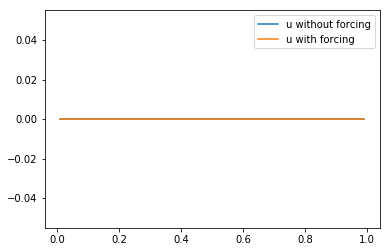

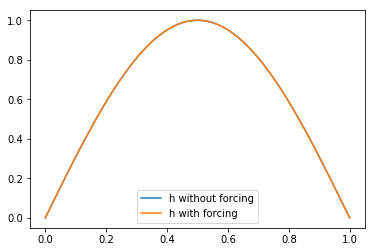

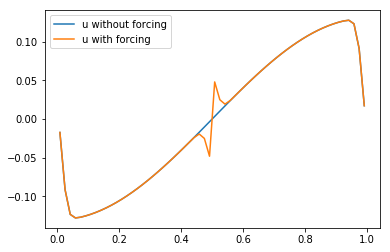

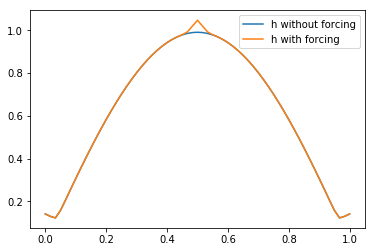

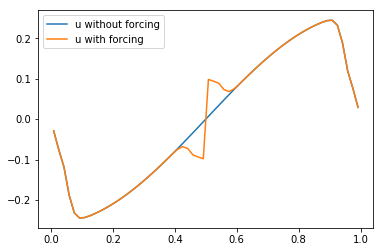

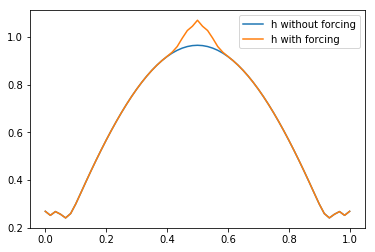

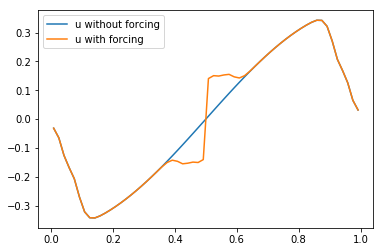

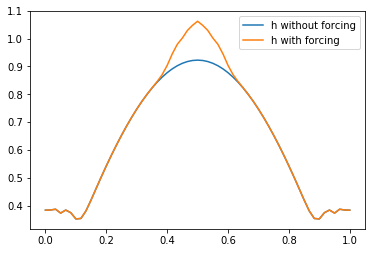

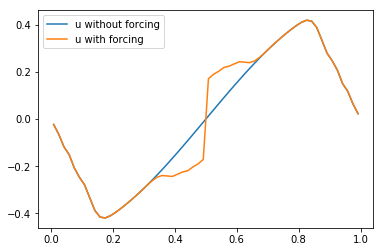

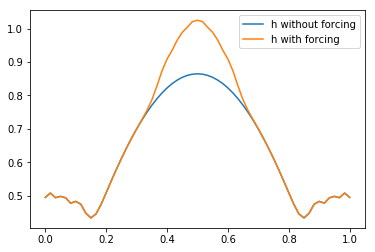

In [145]:
nt = 100
timerange = np.linspace(0, 1, 5)

# plot solution at various time iterations for staggered grid for the initial condition where u is zero everywhere 
# and h is cos
for i in timerange:
    u, h, x1 = C_grid_explicit(initialconditions_cos, nx, i*nt, H = 1, g = 1, w = 8, Forcing = False)
    u_forcing, h_forcing, x2 = C_grid_explicit(initialconditions_cos, nx, i*nt, H = 1, g = 1, w = 8, Forcing = True)

    plt.ion()
    plt.plot((x1 + 1/(2*nx))[:-1], u[:-1], label = 'u without forcing')
    plt.plot((x2 + 1/(2*nx))[:-1], u_forcing[:-1], label = 'u with forcing')
    plt.legend(loc = 'best')
    plt.show()

    plt.plot(x1, h, label = 'h without forcing')
    plt.plot(x2, h_forcing, label = 'h with forcing')
    plt.legend(loc = 'best')
    plt.show()

## Implicit method on A-grid

In [146]:
def implicit_method(initialconditions, nx, nt, H = 1, g = 1, c = 0.1):
    """This function simulates the shallow water equations using the colocated scheme with an implicit method
        Both equations are discretised as backward in time and centred in space.

    initial conditions: function which specifies the initial conditions for the system 
    nx:                 number of space steps
    nt:                 number of time steps
    H:                  mean fluid depth set to 1 unless otherwise specified
    g:                  acceleration due to gravity scaled to 1
    c:                  courant number (c = root(gH)dt/dx)
    """
    
    # set initial conditions
    initialu, initialh, midpoint, x = initialconditions(nx, nt, plot = False)
    uOld = initialu.copy()
    hOld = initialh.copy()
    u = initialu.copy()
    h = initialh.copy()


    # construct matrix to solve implicit method matrix equation
    # as matrix constructed is not dependent on time, only needs to be constructed once
    matrix = np.zeros((nx+1,nx+1))
    
    for i in range(nx+1):    
        matrix[i,i] = 1 + c**2/2
        matrix[i, (i-2)%nx] = -(c**2)/4
        matrix[i, (i+2)%nx] = -(c**2)/4
    
    # loop over timesteps
    for it in range(int(nt)):      
        
        uvector = np.zeros_like(uOld)
        for i in range(nx+1):
            uvector[i] = math.sqrt(H/g)*(c/2)*(uOld[(i+1)%nx] - uOld[(i-1)%nx])
            
        # solve matrix equation to find h
        h = np.linalg.solve(matrix, hOld - uvector)
    
        hvector = np.zeros_like(hOld)
        for i in range(nx+1):
            hvector[i] = math.sqrt(g/H)*(c/2)*(hOld[(i+1)%nx] - hOld[(i-1)%nx])

        # solve matrix equation to find u
        u = np.linalg.solve(matrix, uOld - hvector)
        
        # copy u and h for next iteration
        hOld = h.copy()
        uOld = u.copy()
    return u, h, x

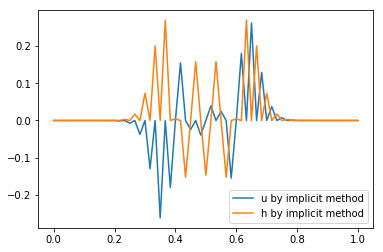

In [13]:
# plot solution for an implicit method on a colocated grid for the initial condition where u is zero everywhere 
# and h is zero everywhere apart from one point at the centre where it is one

u_implicit, h_implicit, x = implicit_method(initialconditions_spike, nx, nt = 100)

plt.clf()
plt.ion()
plt.plot(x, u_implicit, label = 'u by implicit method')
plt.plot(x, h_implicit, label = 'h by implicit method')
plt.legend(loc = 'best')
plt.show()

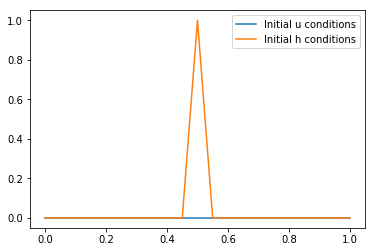

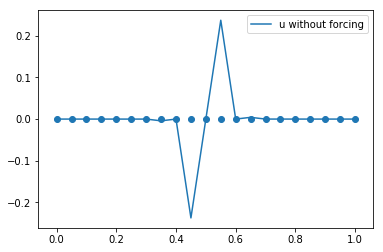

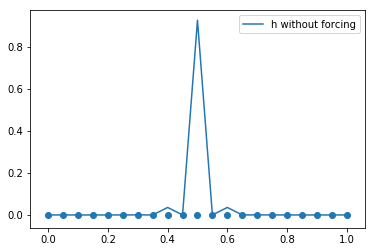

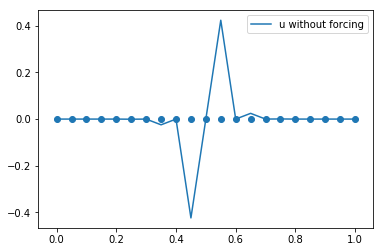

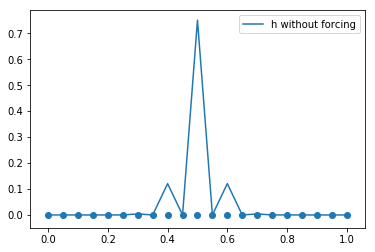

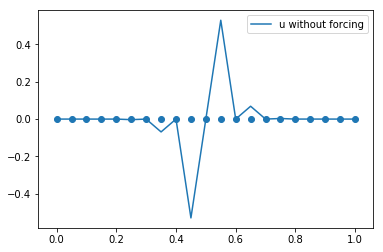

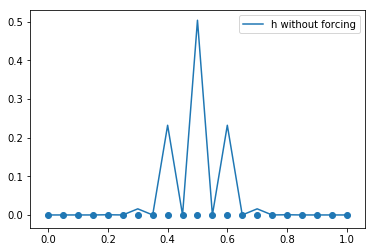

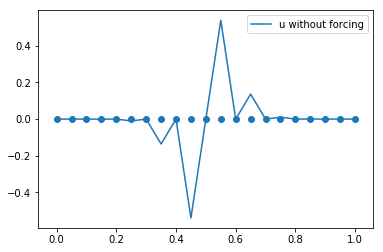

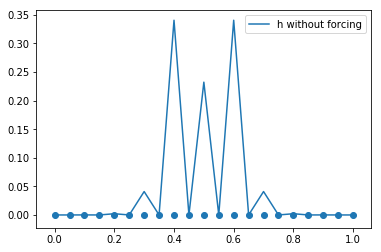

In [24]:
# multiple time steps

nt = 20

timerange = np.linspace(0, nt, 5)

initialconditions_spike(20,nt)

# plot solution at various time iterations for an explicit method on a colocated grid for the initial condition where u is zero everywhere 
# and h is zero everywhere apart from one point at the centre where it is one
for i in timerange[1:]:
    u, h, x1 = implicit_method(initialconditions_spike, nx = 20, nt = i)
    #u_forcing, h_forcing, x2 = implicit(initialconditions_spike, 20, i, Forcing = True)

    plt.ion()
    plt.plot(x1, u, label = 'u without forcing')
    #plt.plot(x2, u_forcing, label = 'u with forcing')
    plt.scatter(x1,np.zeros_like(x1))
    plt.legend(loc = 'best')
    plt.show()

    plt.plot(x1, h, label = 'h without forcing')
    plt.scatter(x1,np.zeros_like(x1))
    #plt.plot(x2, h_forcing, label = 'h with forcing')
    plt.legend(loc = 'best')
    plt.show()

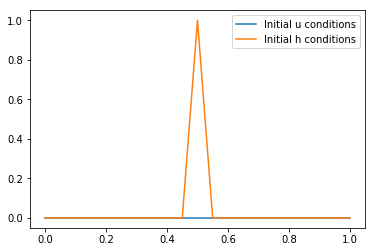

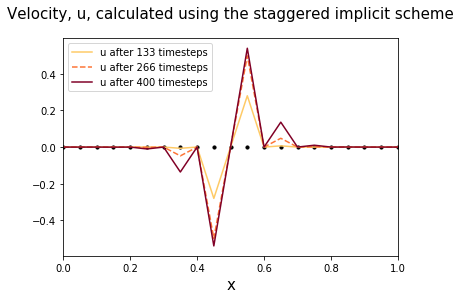

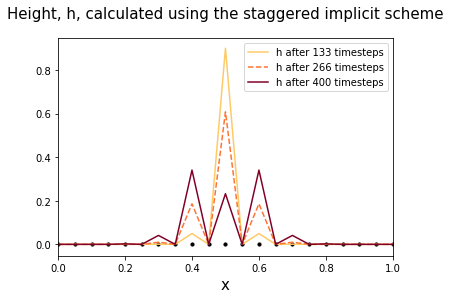

In [122]:
# multiple time steps

nt = 20

# plot solution at various time iterations for an implict method on a colocated grid for the initial condition where u is zero everywhere 
# and h is zero everywhere apart from one point at the centre where it is one


plt.rcParams['axes.titlepad'] = 20 


mymap = plt.get_cmap("YlOrRd")
colorrange = mymap(np.r_[np.array([0.3, 0.55, 1]), np.array([0.3, 0.55, 1])])

linestylerange = np.array(['-', '--', '-'])

timerange = np.linspace(0, nt, 4)

initialconditions_spike(20,nt)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()


for i in range(len(timerange[1:])):
    u, h, x1 = implicit_method(initialconditions_spike, nx = 20, nt = timerange[1+i])
    ax1.plot(x1, u, c = colorrange_u[i], ls = linestylerange[i], label = 'u after ' + str(int(timerange[1+i]*nt)) + ' timesteps')  
    ax2.plot(x1, h, c = colorrange_u[i], ls = linestylerange[i], label = 'h after ' + str(int(timerange[1+i]*nt)) + ' timesteps')

ax1.set_title("Velocity, u, calculated using the staggered implicit scheme")
ax1.set_xlim([0,1])
ax1.set_xlabel("x")
ax1.legend(loc = 'best')

ax2.set_title("Height, h, calculated using the staggered implicit scheme")
ax2.set_xlim([0,1])
ax2.set_xlabel("x")
ax2.legend(loc = 'best')


ax1.scatter(x1,np.zeros_like(x1), c = 'black', s = 10)
ax2.scatter(x1,np.zeros_like(x1), c = 'black', s = 10)
    
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + [ax2.title, ax2.xaxis.label, ax2.yaxis.label]):
    item.set_fontsize(15)

#fig1.show()
#fig2.show()

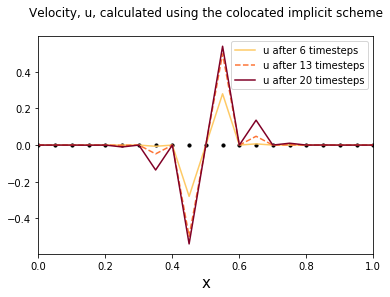

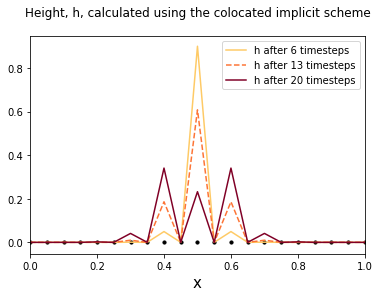

In [152]:
def plot_solution(initialconditions, nx, number_iterations, numerical_method, xmin = 0, xmax = 1):
    """This function plots the solution of the numerical method at various time iterations

    initial conditions: function which specifies the initial conditions for the system 
    nx:                 number of space steps
    number_iterations:  number of time steps for the last iteration that is plotted by this function
    numerical_method:   function which specifies the numerical method used
    xmin:               minimum value of x on grid
    xmax:               maximum value of x on grid
    """
    
    # initialize plots
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    
    # set the colours to be used in the plot
    mymap = plt.get_cmap("YlOrRd")
    colorrange = mymap(np.r_[np.array([0.3, 0.55, 1]), np.array([0.3, 0.55, 1])])

    # set the linestyles that are used for each line in the plot
    linestylerange = np.array(['-', '--', '-'])

    # set the timesteps that will be plotted
    timerange = np.linspace(0, number_iterations, 4)

    # iterate through and plot chosen timesteps - note we do not plot the timestep 0 as this is just the initial condition
    for i in range(len(timerange[1:])):
        u, h, x1 = numerical_method(initialconditions, nx, nt = timerange[1+i])
        ax1.plot(x1, u, c = colorrange[i], ls = linestylerange[i], label = 'u after ' + str(int(timerange[1+i])) + ' timesteps')  
        ax2.plot(x1, h, c = colorrange[i], ls = linestylerange[i], label = 'h after ' + str(int(timerange[1+i])) + ' timesteps')

    # for reference plot the x-meshgrid
    ax1.scatter(x1,np.zeros_like(x1), c = 'black', s = 10)
    ax2.scatter(x1,np.zeros_like(x1), c = 'black', s = 10)
    
    ax1.set_xlim([xmin,xmax])
    ax1.set_xlabel("x")
    ax1.legend(loc = 'best')

    ax2.set_xlim([0,1])
    ax2.set_xlabel("x")
    ax2.legend(loc = 'best') 

    # add space between the title and the plot
    plt.rcParams['axes.titlepad'] = 20 
    # increase the font size
    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + [ax2.title, ax2.xaxis.label, ax2.yaxis.label]):
        item.set_fontsize(15)
        
    return ax1, ax2



ax1, ax2 = plot_solution(initialconditions_spike, 20, 20, implicit_method)

ax1.set_title("Velocity, u, calculated using the colocated implicit scheme")
ax2.set_title("Height, h, calculated using the colocated implicit scheme")



#fig1.show()
#fig2.show()

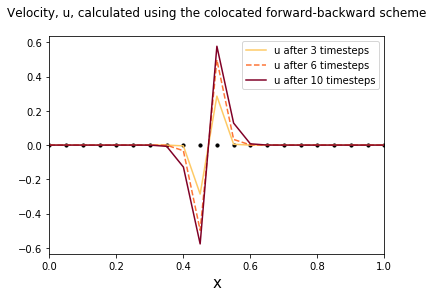

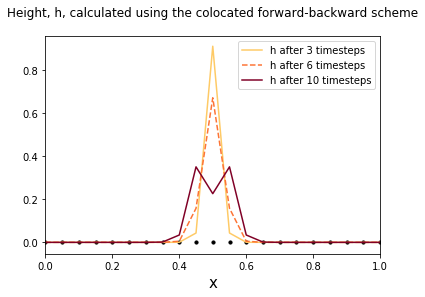

In [153]:
ax1, ax2 = plot_solution(initialconditions_spike, 20, 10, semi_implicit_method)

ax1.set_title("Velocity, u, calculated using the staggered semi-implicit scheme")
ax2.set_title("Height, h, calculated using the staggered semi-implicit scheme")

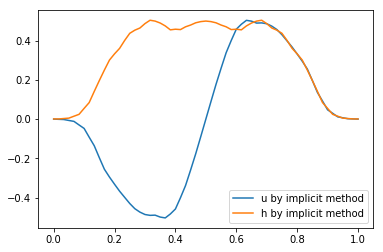

In [14]:
# plot solution for an implicit method on a colocated grid for the initial condition where u is zero everywhere 
# and h has a bump in the centre and is surrounded by zero either side

u_implicit, h_implicit, x = implicit_method(initialconditions_cosbell, nx, nt = 100)

plt.clf()
plt.ion()
plt.plot(x, u_implicit, label = 'u by implicit method')
plt.plot(x, h_implicit, label = 'h by implicit method')
plt.legend(loc = 'best')
plt.show()

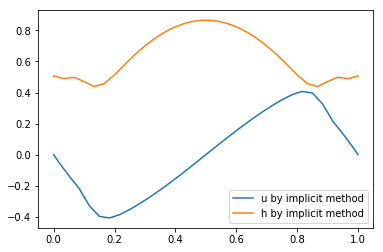

In [15]:
# plot solution for an implicit method on a colocated grid for the initial condition where u is zero everywhere 
# and h is cos

u_implicit, h_implicit, x = implicit_method(initialconditions_cos, nx, nt = 100)

plt.clf()
plt.ion()
plt.plot(x, u_implicit, label = 'u by implicit method')
plt.plot(x, h_implicit, label = 'h by implicit method')
plt.legend(loc = 'best')
plt.show()

## Semi-implicit method on C-grid

In [141]:
def semi_implicit_method(initialconditions, nx, nt, H = 1, g = 1, c = 0.1):
    """This function simulates the shallow water equations using the staggered scheme with a semi-implicit method
        Both equations are discretised using the theta method using theta = 1/2 (ie. crank nicholson) and centred in space.

    initial conditions: function which specifies the initial conditions for the system 
    nx:                 number of space steps
    nt:                 number of time steps
    H:                  mean fluid depth set to 1 unless otherwise specified
    g:                  acceleration due to gravity scaled to 1
    c:                  courant number (c = root(gH)dt/dx)
    """    
    
    # set initial conditions
    initialu, initialh, midpoint, x = initialconditions(nx,nt, plot = False)
    
    uhalf = np.zeros(len(initialu))
    
    # for a c-grid the velocity u is stagerred in the x-direction by half
    for i in range(0, len(initialu)):
        uhalf[i] = flat_u(i+1/2)
    # therefore uhalf[i] = u_{i + 1/2}
    
    # initialize the system
    u_semi_implicit = np.zeros_like(uhalf)
    h_semi_implicit = np.zeros_like(initialh)

    uOld = uhalf.copy()
    hOld = initialh.copy()
    
    # construct matrix to solve implicit method matrix equation
    # as matrix constructed is not dependent on time, only needs to be constructed once
    matrix = np.zeros((nx+1,nx+1))

    for i in range(nx+1):    
        matrix[i,i] = 1 + c**2/2
        matrix[i, (i-1)%nx] = -(c**2)/4
        matrix[i, (i+1)%nx] = -(c**2)/4
    
    # loop over timesteps
    for it in range(int(nt)):
        
        semi_implicit_uvector = np.zeros_like(uOld)
        for i in range(nx + 1):
            semi_implicit_uvector[i] = -math.sqrt(g/H)*c*(hOld[(i + 1)%nx] - hOld[i%nx]) + ((c**2)/4)*uOld[(i+1)%nx] + (1-(c**2)/2)*uOld[i%nx] + ((c**2)/4)*uOld[(i-1)%nx]
        
        # solve matrix equation to find u
        u_semi_implicit = np.linalg.solve(matrix, semi_implicit_uvector)

        semi_implicit_hvector = np.zeros_like(hOld)
        for i in range(nx + 1):
            semi_implicit_hvector[i] = -math.sqrt(H/g)*c*(uOld[i%nx] - uOld[(i-1)%nx]) + ((c**2)/4)*hOld[(i+1)%nx] + (1-(c**2)/2)*hOld[(i)%nx] + ((c**2)/4)*hOld[(i-1)%nx]
        
        # solve matrix equation to find h
        h_semi_implicit = np.linalg.solve(matrix, semi_implicit_hvector)

        # copy u and h for next iteration
        uOld = u_semi_implicit.copy()
        hOld = h_semi_implicit.copy()

    return u_semi_implicit, h_semi_implicit, x

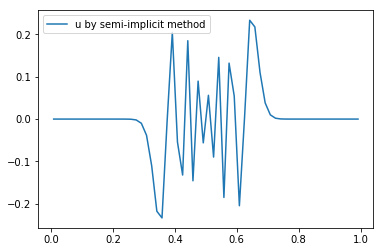

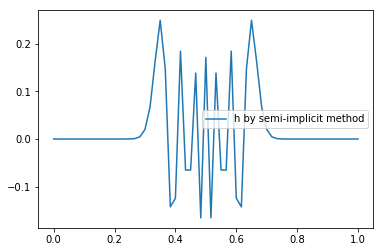

In [17]:
# plot solution for a semi-implicit method on a staggered grid for the initial condition where u is zero everywhere 
# and h is zero everywhere apart from one point at the centre where it is one

u_semi_implicit, h_semi_implicit, x = semi_implicit_method(initialconditions_spike, nx, nt = 100)

plt.clf()
plt.ion()
plt.plot((x + 1/(2*nx))[:-1], u_semi_implicit[:-1], label = 'u by semi-implicit method')
plt.legend(loc = 'best')
plt.show()

plt.clf()
plt.ion()
plt.plot(x, h_semi_implicit, label = 'h by semi-implicit method')
plt.legend(loc = 'best')
plt.show()

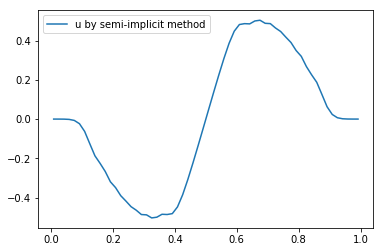

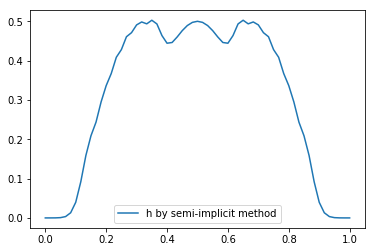

In [18]:
# plot solution for a semi-implicit method on a staggered grid for the initial condition where u is zero everywhere 
# and h has a bump in the centre and is surrounded by zero either side

u_semi_implicit, h_semi_implicit, x = semi_implicit_method(initialconditions_cosbell, nx, nt = 100)

plt.clf()
plt.ion()
plt.plot((x + 1/(2*nx))[:-1], u_semi_implicit[:-1], label = 'u by semi-implicit method')
plt.legend(loc = 'best')
plt.show()

plt.clf()
plt.ion()
plt.plot(x, h_semi_implicit, label = 'h by semi-implicit method')
plt.legend(loc = 'best')
plt.show()

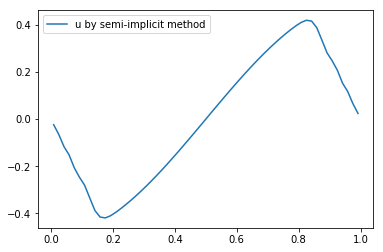

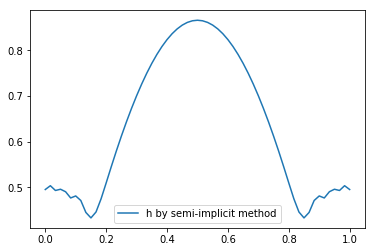

In [19]:
# plot solution for a semi-implicit method on a staggered grid for the initial condition where u is zero everywhere 
# and h is cos

u_semi_implicit, h_semi_implicit, x = semi_implicit_method(initialconditions_cos, nx, nt = 100)

plt.clf()
plt.ion()
plt.plot((x + 1/(2*nx))[:-1], u_semi_implicit[:-1], label = 'u by semi-implicit method')
plt.legend(loc = 'best')
plt.show()

plt.clf()
plt.ion()
plt.plot(x, h_semi_implicit, label = 'h by semi-implicit method')
plt.legend(loc = 'best')
plt.show()